In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import mediapy
import dataclasses
import matplotlib.pyplot as plt

from waymax import config as _config
from waymax import dataloader
from waymax import datatypes
from waymax import visualization
from waymax import env as _env
from waymax import agents
from waymax import dynamics

2024-05-27 16:30:30.996672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
MAX_NUM_OBJECTS = 16

config = dataclasses.replace(_config.WOD_1_1_0_TRAINING, max_num_objects=MAX_NUM_OBJECTS)
data_iter = dataloader.simulator_state_generator(config)
scenario = next(data_iter)

2024-05-27 16:30:39.893634: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [12]:
# TODO: check the scenario(state) for map informations

scenario.timestep

Array(0, dtype=int32)

""

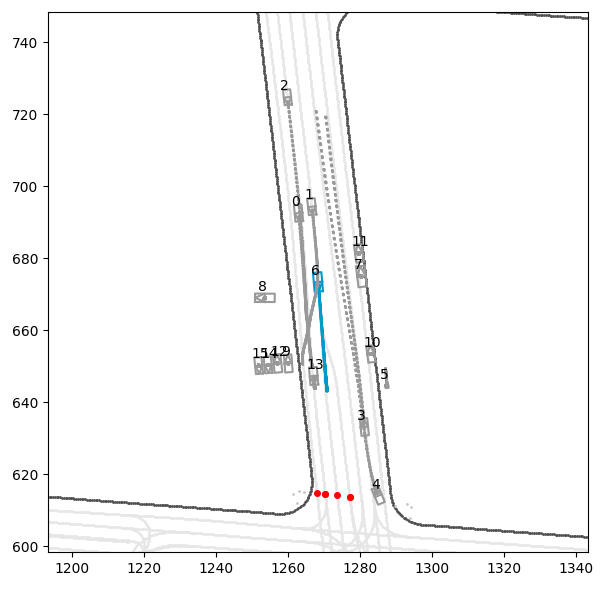

In [3]:
img = visualization.plot_simulator_state(scenario)
mediapy.show_image(img)

In [13]:
dynamics_model = dynamics.StateDynamics()

env_config = dataclasses.replace(
    _config.EnvironmentConfig(),
    max_num_objects=MAX_NUM_OBJECTS,
    controlled_object=_config.ObjectType.VALID
)

env = _env.MultiAgentEnvironment(
    dynamics_model,
    config=env_config)